In [13]:
import numpy as np
import pandas as pd
import math
import cmath
import matplotlib.pyplot as plt

In [2]:
def linGen(a,b,m,seed,N):
  res = []
  x = seed
  u = x/m
  for _ in range(N):
    x = (a*x + b)%m
    u = x/m
    res.append(u)
  return res

In [14]:
# ranges = linGen(175, 34, 5263266, 23, 1000000)
ranges = np.random.rand(1000000)

In [15]:
def MargsaliaBray(N):
  i = 0
  res1 = []
  res2 = []
  u1,u2 = 0,0
  z1 = 0
  z2 = 0
  for _ in range(N):
    u1 = ranges[i]
    u2 = ranges[i+1]
    u1 = 2*u1-1
    u2 = 2*u2-1
    while(1):
      if(u1*u1 + u2*u2<=1): break
      i+=2
      u1 = ranges[i]
      u2 = ranges[i+1]
      u1 = 2*u1-1
      u2 = 2*u2-1
    i+=2
    temp = u1**2 + u2**2
    z1 = u1 * math.sqrt((-2*math.log(temp))/temp)
    z2 = u2 * math.sqrt((-2*math.log(temp))/temp)
    res1.append(z1)
    res2.append(z2)
  return res1, res2

In [25]:
def multiNorm(x1,x2,myu1,myu2,si1,si2,a):
	x1=(x1-myu1)/si1
	x2=(x2-myu2)/si2
	k=(-1/(2*(1-a*a)))*(x1**2+x2**2-2*a*x1*x2)
	return (1/((2*np.pi)*si1*si2*np.power(1-a*a,0.5))*(np.power(np.e,k)))

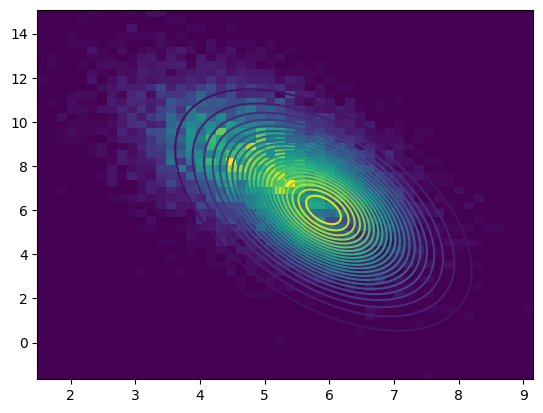

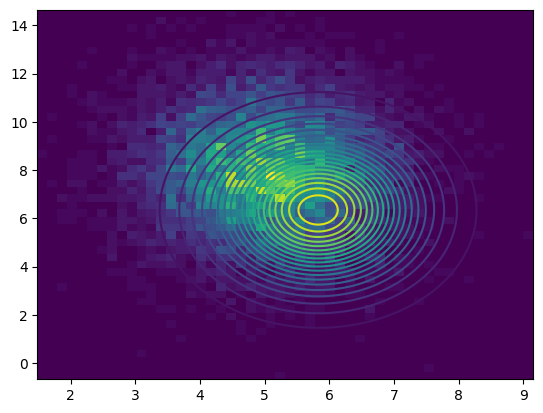

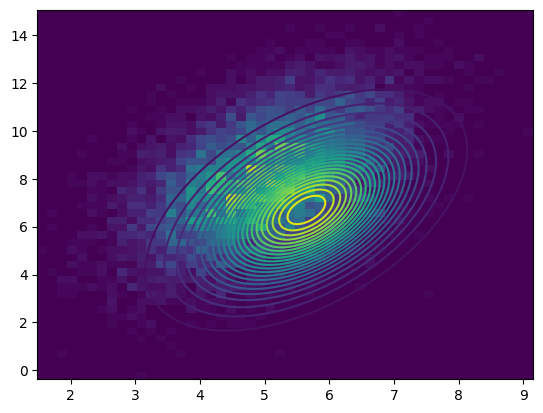

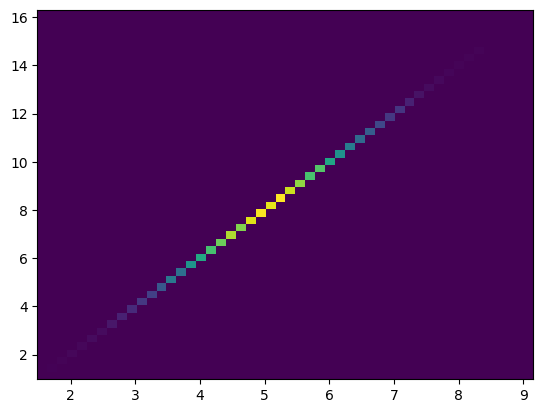

In [24]:
for a in [-0.5, 0, 0.5, 1]:
  sig1 = 1
  sig2 = 2
  Z1, Z2 = MargsaliaBray(10000)
  Z1 = np.array(Z1)
  Z2 = np.array(Z2)
  X1 = 5 + sig1*Z1
  X2 = 8 + a*sig2*Z1 + math.sqrt(1-a**2)*sig2*Z2
  plt.hist2d(X1, X2, bins=50)
  if(a!=1):
    x = np.linspace(min(X1), max(X1), 1000)
    y = np.linspace(min(X2), max(X2), 1000)
    z = np.zeros((1000, 1000))
    for i in range(0, 1000):
      for j in range(0, 1000):
        z[i][j] = multiNorm( x[i], y[j], 5, 8, 1, 2, a)
    plt.contour(x,y,z,25)
  plt.show()

In [ ]:
np.rand()